In [8]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# MNIST 데이터 셋을 호출
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

In [11]:
# 생성자 모델 만들기
autoencoder = Sequential()

In [12]:
# 인코딩 부분
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation ='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size =2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

In [13]:
# 디코딩 부분
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

In [14]:
# 전체 구조 확인
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 8, 8, 8)          

In [15]:
# 컴파일 및 학습을 하는 부분
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 49s 823us/sample - loss: 0.2126 - val_loss: 0.1399
Epoch 2/50
60000/60000 [==============================] - 47s 783us/sample - loss: 0.1287 - val_loss: 0.1189
Epoch 3/50
60000/60000 [==============================] - 47s 787us/sample - loss: 0.1155 - val_loss: 0.1110
Epoch 4/50
60000/60000 [==============================] - 47s 786us/sample - loss: 0.1098 - val_loss: 0.1065
Epoch 5/50
60000/60000 [==============================] - 47s 789us/sample - loss: 0.1060 - val_loss: 0.1032
Epoch 6/50
60000/60000 [==============================] - 48s 795us/sample - loss: 0.1033 - val_loss: 0.1008
Epoch 7/50
60000/60000 [==============================] - 49s 824us/sample - loss: 0.1012 - val_loss: 0.0992
Epoch 8/50
60000/60000 [==============================] - 52s 865us/sample - loss: 0.0996 - val_loss: 0.0979
Epoch 9/50
60000/60000 [==============================] - 52s 868us/sample - l

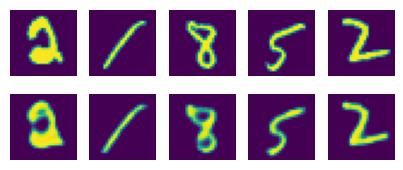

In [16]:
# 학습된 결과를 출력하는 부분입니다.
# 테스트할 이미지를 랜덤하게 불러와 오토인코더에 모델을 집어 넣음
random_test = np.random.randint(X_test.shape[0], size=5)  
ae_imgs = autoencoder.predict(X_test) 

# 출력될 이미지의 크기 설정
plt.figure(figsize=(7, 2))  

# 랜덤하게 뽑은 이미지를 차례로 나열합니다.
for i, image_idx in enumerate(random_test):   
   ax = plt.subplot(2, 7, i + 1) 
   plt.imshow(X_test[image_idx].reshape(28, 28))  # 테스트할 이미지를 먼저 그대로 보여줍니다.
   ax.axis('off')
   ax = plt.subplot(2, 7, 7 + i +1)
   plt.imshow(ae_imgs[image_idx].reshape(28, 28))  # 오토인코딩 결과를 다음열에 출력합니다.
   ax.axis('off')
plt.show()